In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set the number of samples for the prior predictive check
n_samples = 10000

# Define the priors
# Beta_0 ~ Normal(-19, 100000)
mu_beta_0 = -19
sigma_beta_0 = np.sqrt(100000)
beta_0_samples = np.random.normal(mu_beta_0, sigma_beta_0, n_samples)

# B_1 ~ Uniform(-10, 0)
b1_samples = np.random.uniform(-10, 0, n_samples)

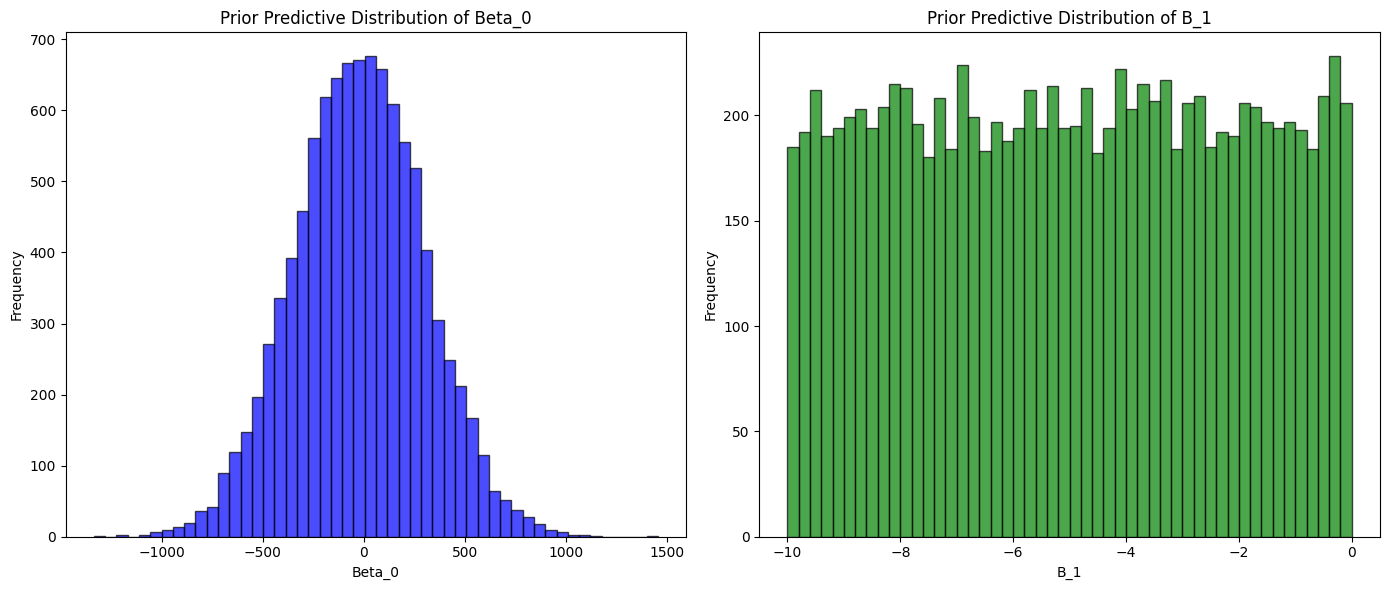

In [3]:
# Plot the prior predictive distributions
plt.figure(figsize=(14, 6))

# Plot for Beta_0
plt.subplot(1, 2, 1)
plt.hist(beta_0_samples, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Prior Predictive Distribution of Beta_0")
plt.xlabel("Beta_0")
plt.ylabel("Frequency")

# Plot for B_1
plt.subplot(1, 2, 2)
plt.hist(b1_samples, bins=50, color='green', alpha=0.7, edgecolor='black')
plt.title("Prior Predictive Distribution of B_1")
plt.xlabel("B_1")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


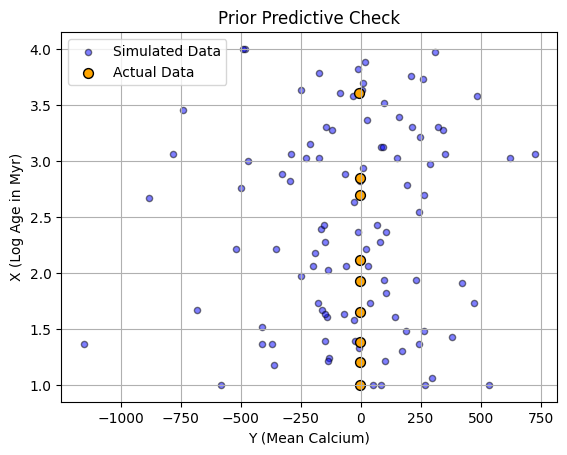

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameters
n_samples = 100
x_values = np.linspace(1, 4, n_samples)

# Define priors
mu_beta_0 = -19  # Mean of Beta_0
sigma_beta_0 = np.sqrt(100000)  # Std deviation of Beta_0
beta_0_samples = np.random.normal(mu_beta_0, sigma_beta_0, n_samples)

beta_1_samples = np.random.uniform(-10, 0, n_samples)

# Simulate individual X and Y values from the priors
x_simulated = np.random.choice(x_values, n_samples) 
y_simulated = beta_0_samples + beta_1_samples * x_simulated

# Actual Data
clusters = [
    {"Cluster_Name": "Hyades", "mean": -4.485976, "std": 0.090107, "Age_Myr": 700.0},
    {"Cluster_Name": "M67", "mean": -4.817857, "std": 0.125731, "Age_Myr": 4000.0},
    {"Cluster_Name": "Pleiades", "mean": -4.299286, "std": 0.229633, "Age_Myr": 130.0},
    {"Cluster_Name": "Tuc", "mean": -4.270556, "std": 0.147756, "Age_Myr": 45.0},
    {"Cluster_Name": "UCL", "mean": -4.060625, "std": 0.071536, "Age_Myr": 16.0},
    {"Cluster_Name": "UMa", "mean": -4.496500, "std": 0.127455, "Age_Myr": 500.0},
    {"Cluster_Name": "US", "mean": -4.057500, "std": 0.128924, "Age_Myr": 10.0},
    {"Cluster_Name": "alpha_Per", "mean": -4.241250, "std": 0.305719, "Age_Myr": 85.0},
    {"Cluster_Name": "beta_Pic", "mean": -4.152611, "std": 0.230746, "Age_Myr": 24.0},
]
actual_x = [np.log10(cluster["Age_Myr"]) for cluster in clusters]  # X -> log Age
actual_y = [cluster["mean"] for cluster in clusters]  # Y -> Mean Calcium

# Plot simulated data
plt.scatter(y_simulated, x_simulated, alpha=0.5, color='blue', edgecolor='k', s=20, label="Simulated Data")

# Plot actual data
plt.scatter(actual_y, actual_x, color='orange', edgecolor='k', s=50, label="Actual Data")

plt.title("Prior Predictive Check")
plt.xlabel("Y (Mean Calcium)")
plt.ylabel("X (Log Age in Myr)")
plt.legend()
plt.grid()
plt.show()


### Posterior Predictive Check

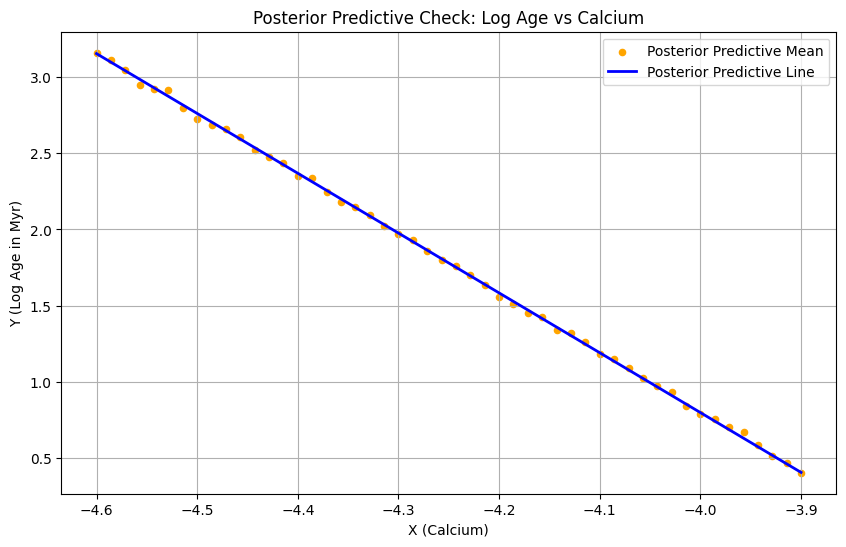

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define posterior values
beta_0 = -14.923  # Posterior for Beta_0
beta_1 = -3.93    # Posterior for Beta_1
lambda_value = 0.766  # Posterior precision
sigma = 1 / np.sqrt(lambda_value)  # Convert precision to standard deviation

# Step 2: Define Calcium values (predictor X)
X_calcium = np.linspace(-4.6, -3.9, 50)  # Simulated Calcium values from -4.6 to -3.9 (plausible range)

# Step 3: Simulate posterior predictive values for Log Age
n_samples = 5000  # Number of samples for posterior predictive check
np.random.seed(5731)

posterior_predictive_Y = np.zeros(len(X_calcium))  # Store the average predicted Y-values

for i, x in enumerate(X_calcium):
    # Simulate n_samples of posterior predictive Y-values for each Calcium value
    y_samples = beta_0 + beta_1 * x + np.random.normal(0, sigma, size=n_samples)
    posterior_predictive_Y[i] = np.mean(y_samples)  # Average over the samples

# Step 4: Plot posterior predictive check
plt.figure(figsize=(10, 6))

# Scatter plot: Posterior predictive average for each Calcium value
plt.scatter(X_calcium, posterior_predictive_Y, color="orange", label="Posterior Predictive Mean", s=20)

# Plot the posterior predictive regression line
posterior_mean_Y = beta_0 + beta_1 * X_calcium
plt.plot(X_calcium, posterior_mean_Y, color="blue", label="Posterior Predictive Line", linewidth=2)

# Customize plot
plt.title("Posterior Predictive Check: Log Age vs Calcium")
plt.xlabel("X (Calcium)")
plt.ylabel("Y (Log Age in Myr)")
plt.legend()
plt.grid()
plt.show()

